In [ ]:
!pip install -qq google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install requests pillow

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.gmail.jmartindev.timetune',
    'com.artfulagenda.app',
    'com.tasks.android',
    'com.appgenix.bizcal',
    'com.appxy.planner'
]

In [ ]:
len(app_packages)

15

In [ ]:
app_infos = []

for ap in tqdm (app_packages):
  info = app(ap, lang="en", country="us")
  del info['comments']
  app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  6.47it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      indent=2,
      sort_keys = True,
      default = str
  )

  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "categories": [
    {
      "id": "PRODUCTIVITY",
      "name": "Productivity"
    }
  ],
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 40M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, a planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do lis

In [ ]:
from PIL import Image
import requests
from io import BytesIO

In [ ]:
def format_title(title):
  sep_index = title.find(":") if title.find(":") != -1 else title.find("-")
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

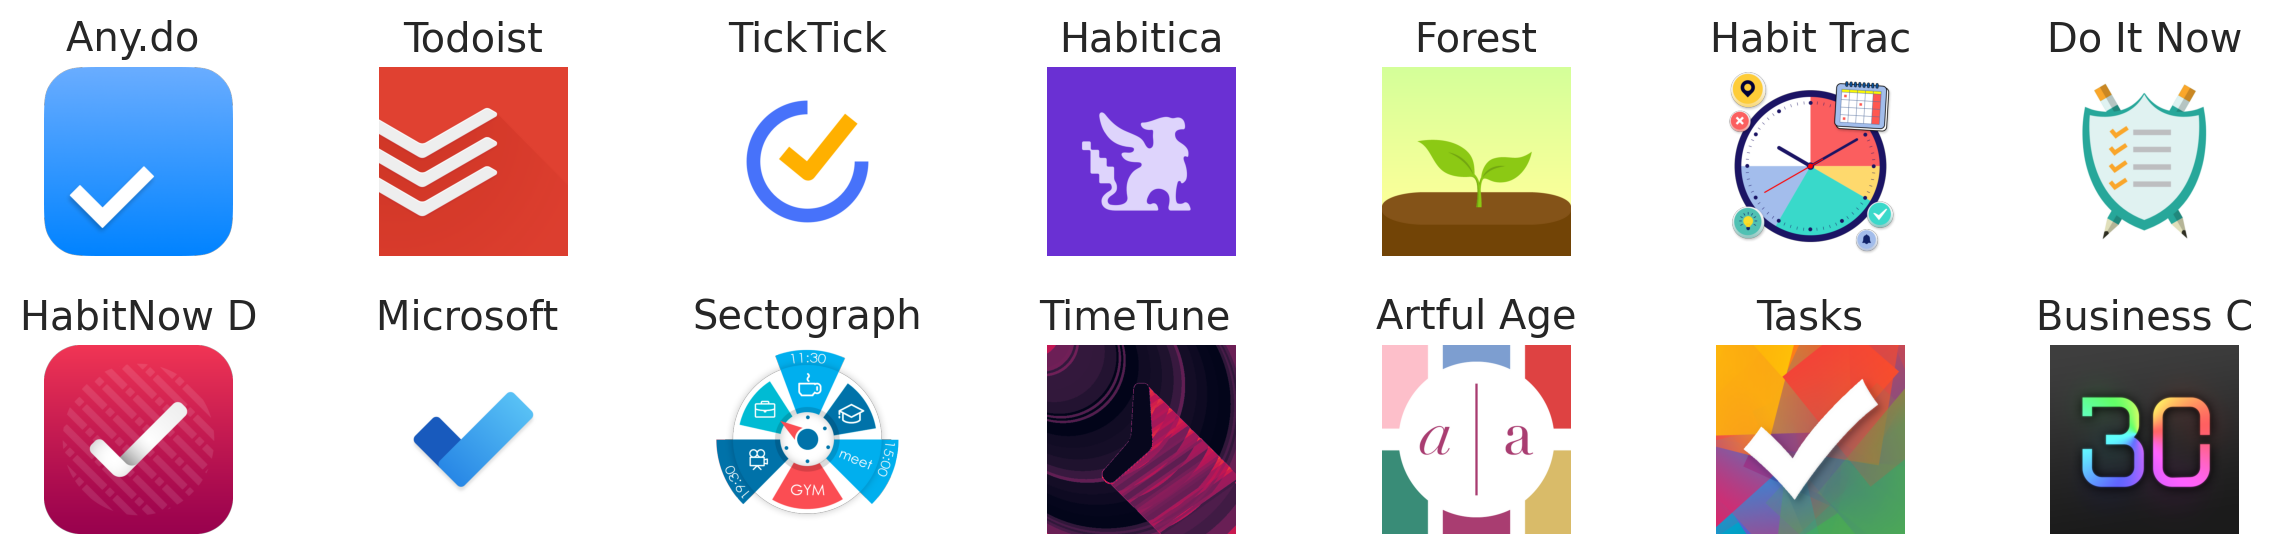

In [ ]:
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(12, 3))

for i, ax in enumerate(axs.flat):
    app_info = app_infos[i]
    icon_url = app_info['icon']

    # Download the image from the URL and convert it to a NumPy array
    response = requests.get(icon_url)
    img = Image.open(BytesIO(response.content))
    img = np.array(img)

    ax.imshow(img)
    ax.set_title(format_title(app_info['title']))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(n=2)

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRating,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,updated,version,appId,url
0,Any.do - To do list & Calendar,"🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,30363569,4.398956,485351,36046,...,Everyone,None,False,False,"Nov 10, 2011","Jun 30, 2024",1719732827,Varies with device,com.anydo,https://play.google.com/store/apps/details?id=...
1,Todoist: to-do list & planner,"Trusted by over 42 million people, Todoist sim...","Trusted by over 42 million people, Todoist sim...","Simple yet powerful to-do list, habit tracker ...","10,000,000+",10000000,41278203,4.427288,267160,16088,...,Everyone,None,False,False,"Nov 18, 2012","Jul 25, 2024",1721896001,Varies with device,com.todoist,https://play.google.com/store/apps/details?id=...


In [ ]:
app_infos_df.to_csv("apps.csv", index = False, header = True)

Get App Reviews

In [42]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in range(1, 6):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang="en",
                country="us",
                sort=sort_order,
                count=200 if score == 3 else 100,
                filter_score_with=score
            )

            if isinstance(rvs, list):
                for r in rvs:
                    if isinstance(r, dict):
                        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                        r['appId'] = ap
                    else:
                        print(f"Expected a dict but got {type(r)} in rvs: {r}")
                app_reviews.extend(rvs)
            else:
                print(f"Expected a list but got {type(rvs)}: {rvs}")

100%|██████████| 15/15 [00:32<00:00,  2.19s/it]


In [46]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "appVersion": "5.18.0.2",
  "at": "2024-07-13 22:25:37",
  "content": "The 'upgrade to premium' button is right in the middle of the page which is really annoying. It moves over the text field every time I add a task and my list of tasks on the main page. If I click plus to add a task to tomorrow, it auto adds a reminder for 9am. Why? If I uncheck the reminder, it auto moves my task to today. Why?! If i add to Upcoming, it auto moves it to tomorrow w/ 9 am reminder. Ugh Ive been using this app for 10m & I already dislike it. I'll only stick around a little longer.",
  "repliedAt": "2024-07-14 08:30:22",
  "replyContent": "You can dismiss the premium option and keep using the app for free. If you add a task with our a due time it will add a default reminder. If you do not have a due date at all it will go under today. The goal is to get things done :)",
  "reviewCreatedVersion": "5.18.0.2",
  "reviewId": "6e865ed7-6788-49cf-9810-0541068e3882",
  "score": 1,
 

In [47]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(17666, 13)

In [48]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,6e865ed7-6788-49cf-9810-0541068e3882,Gianna,https://play-lh.googleusercontent.com/a-/ALV-U...,The 'upgrade to premium' button is right in th...,1,2,5.18.0.2,2024-07-13 22:25:37,You can dismiss the premium option and keep us...,2024-07-14 08:30:22,5.18.0.2,most_relevant,com.anydo
1,ca11e275-f9a7-4b0a-a4d1-f2981b568a46,David Ottley,https://play-lh.googleusercontent.com/a/ACg8oc...,"I have used this app for several years, and it...",1,26,5.18.0.2,2024-06-08 18:42:11,Please contact our team and we will help you r...,2024-06-09 09:56:26,5.18.0.2,most_relevant,com.anydo
2,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,1,15,4.16.6.2,2020-07-22 13:13:10,Our team will be happy to look into it for you...,2020-07-23 16:32:02,4.16.6.2,most_relevant,com.anydo
3,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",1,11,None,2020-12-08 06:24:40,We are not aware of any issues with randomized...,2020-12-10 09:38:20,None,most_relevant,com.anydo
4,4be108fd-03e4-4698-b685-ad73ebefe3e9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I was a big fan of this app, but the recent UI...",1,91,4.10.6.1,2018-11-18 14:31:49,This is very strange behavior for your reminde...,2018-11-19 17:13:30,4.10.6.1,most_relevant,com.anydo


In [49]:
app_reviews_df.to_csv("reviews.csv", index = False, header = True)